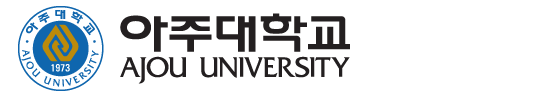

인공지능입문 (2024-11-28 목요일)


# Pytorch

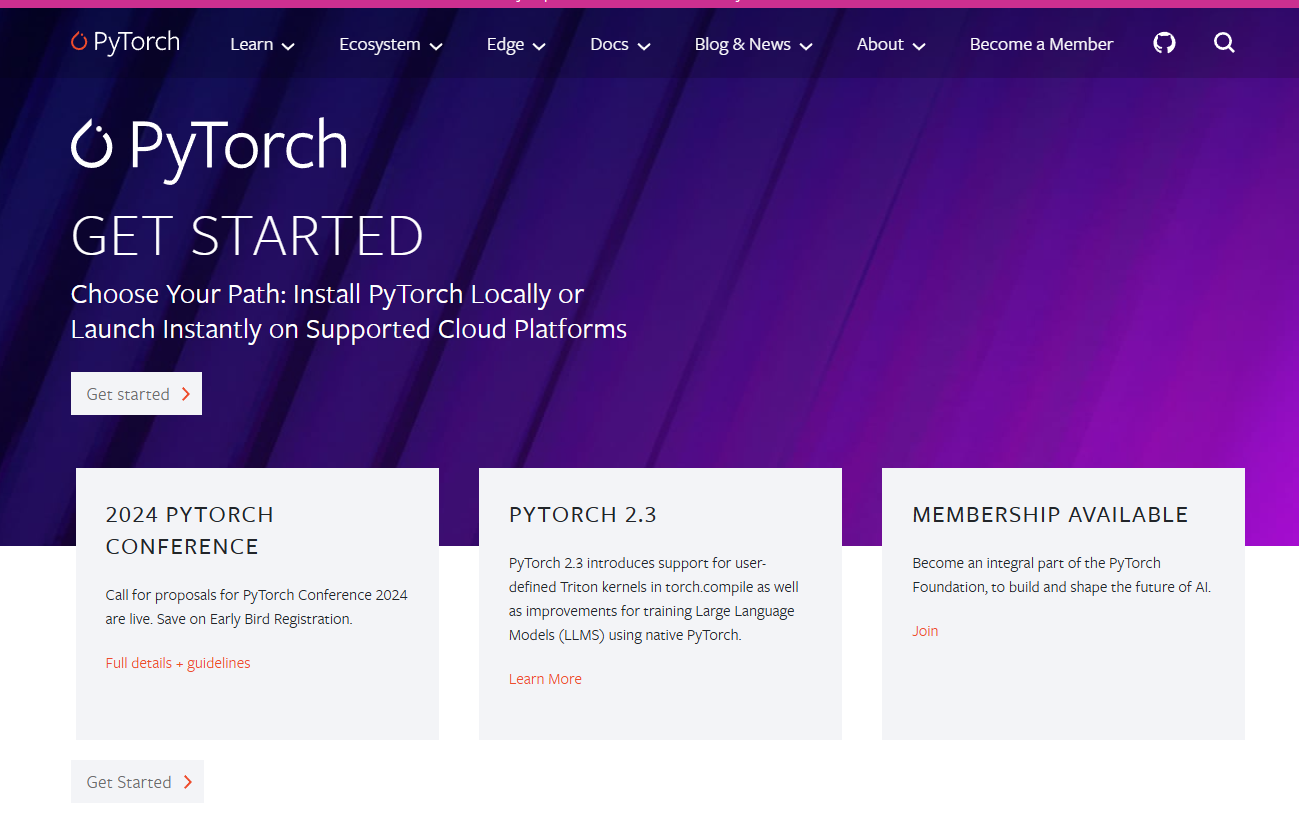

https://pytorch.org/

- Deep Learning을 위한 다양한 함수 제공

# Pytorch Vs TensorFlow

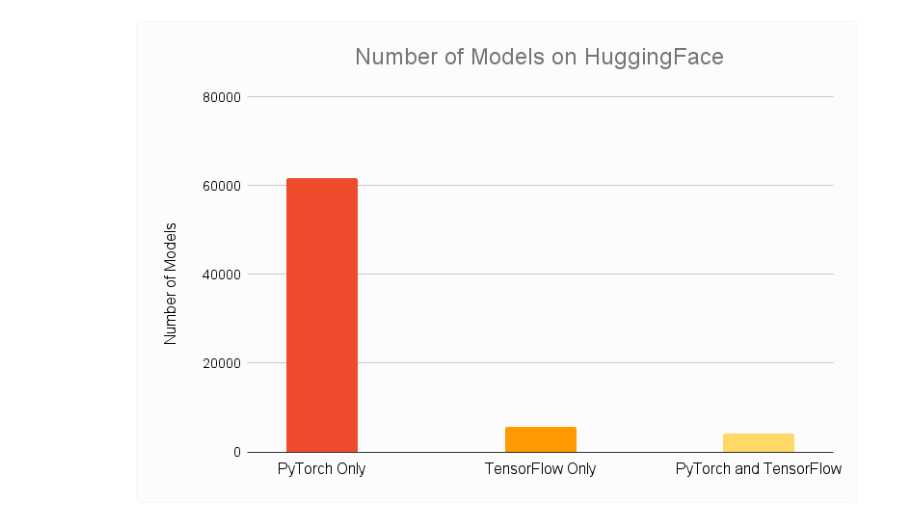

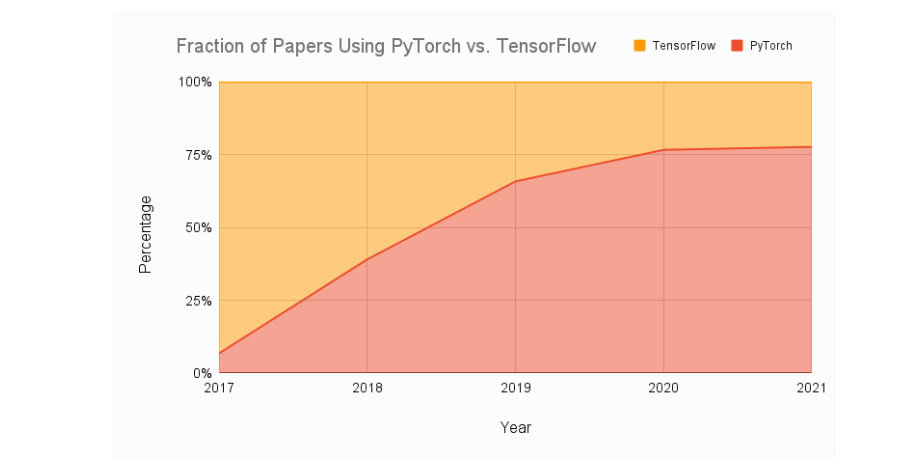

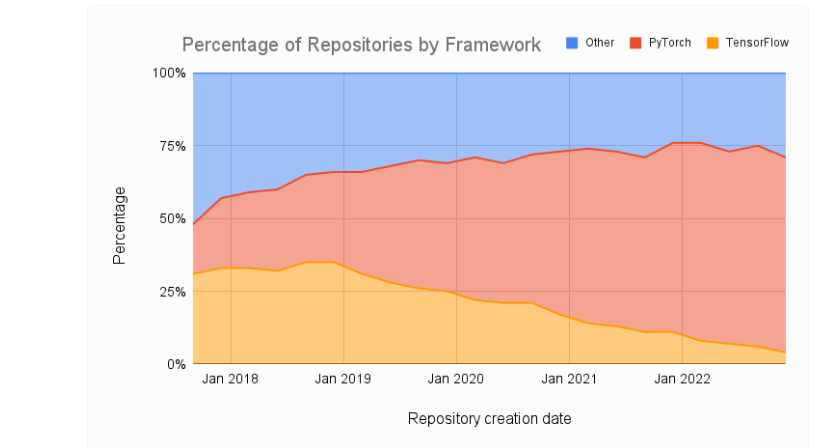

-출처: https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2023/

In [ ]:
# 설치

!pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu


# Tensor

- Tensor란 GPU 연산이 가능한 다차원 행렬
- 신경망을 학습할 때, Backward 과정에서 필요한 미분값을 자동으로 계산

In [ ]:
# Numpy와 유사

import numpy as np

arr1d = np.array([1, 2, 3, 4, 5]) # 1차원 배열 생성
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) # 2차원 배열 생성

print(arr1d)
print(arr2d)



[1 2 3 4 5]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
# Tensor 만들기

import torch

x = torch.empty(3, 4)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[1.8492e+20, 2.7685e+20, 4.9658e+28, 7.5554e+28],
        [5.2839e-11, 2.9393e+29, 1.2736e-14, 4.7364e+30],
        [4.7429e+30, 5.1476e+22, 4.7426e+30, 3.8462e-11]])


In [ ]:
zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

torch.manual_seed(1729)
random = torch.rand(1, 4)
print(random)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3126, 0.3791, 0.3087, 0.0736]])


# Numpy to Tensor

- torch.FloatTensor(numpy.array)
- torch.LongTensor(numpy.array)

In [ ]:
torch_arr1d = torch.FloatTensor(arr1d)
print(arr1d)
print(torch_arr1d)

random = torch.rand(1, 4)
print(random)

[1 2 3 4 5]
tensor([1., 2., 3., 4., 5.])
tensor([[0.4216, 0.0691, 0.2332, 0.4047]])


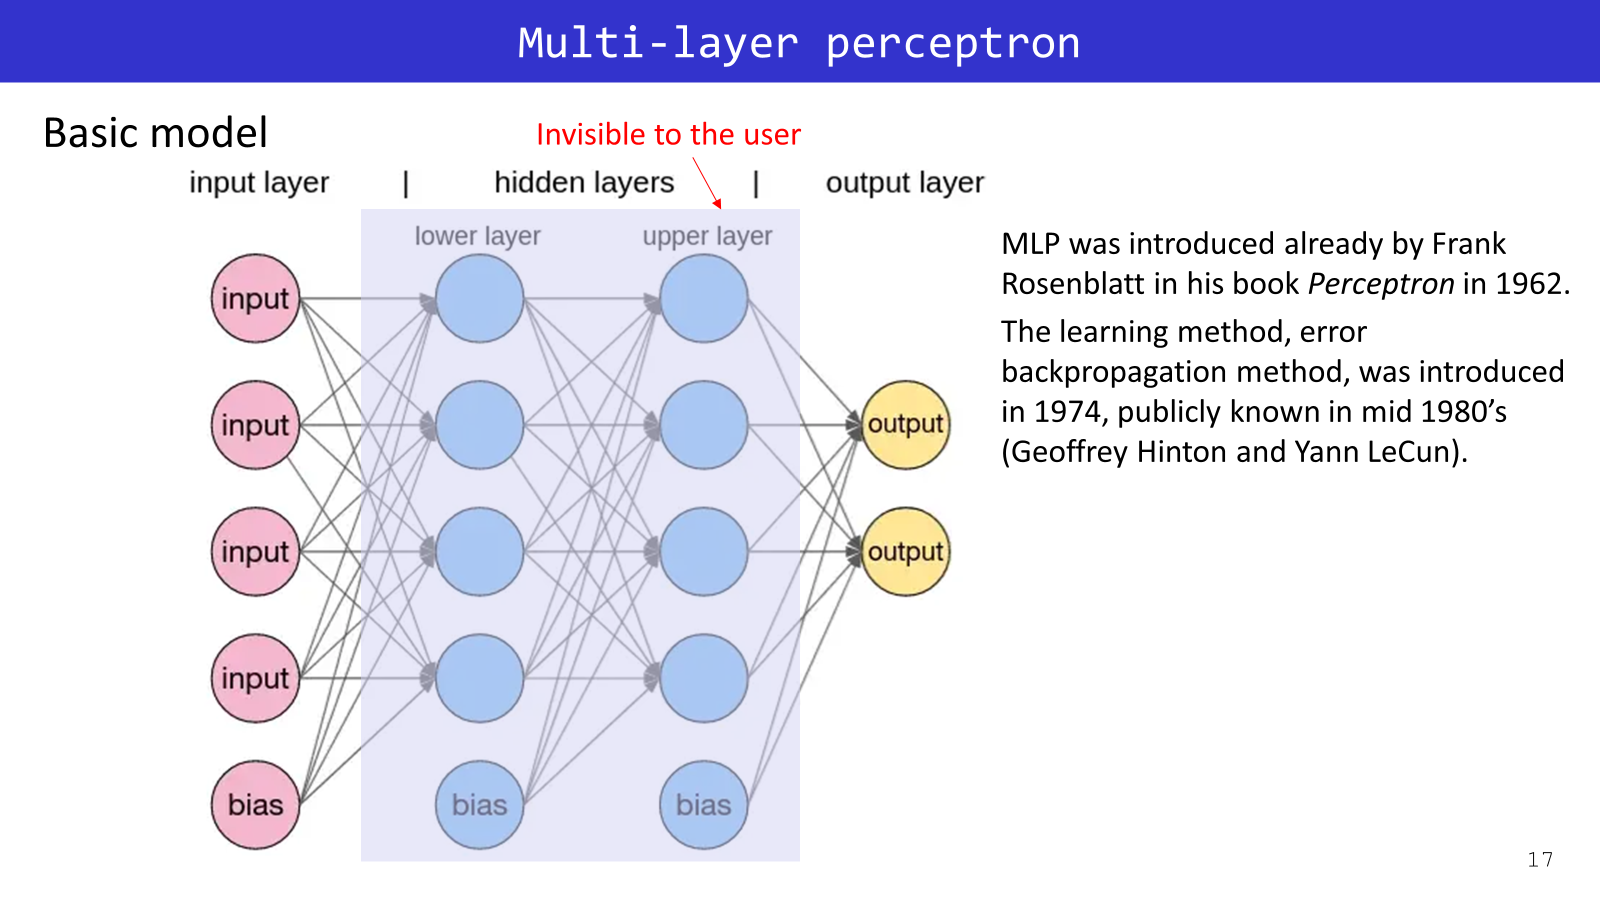
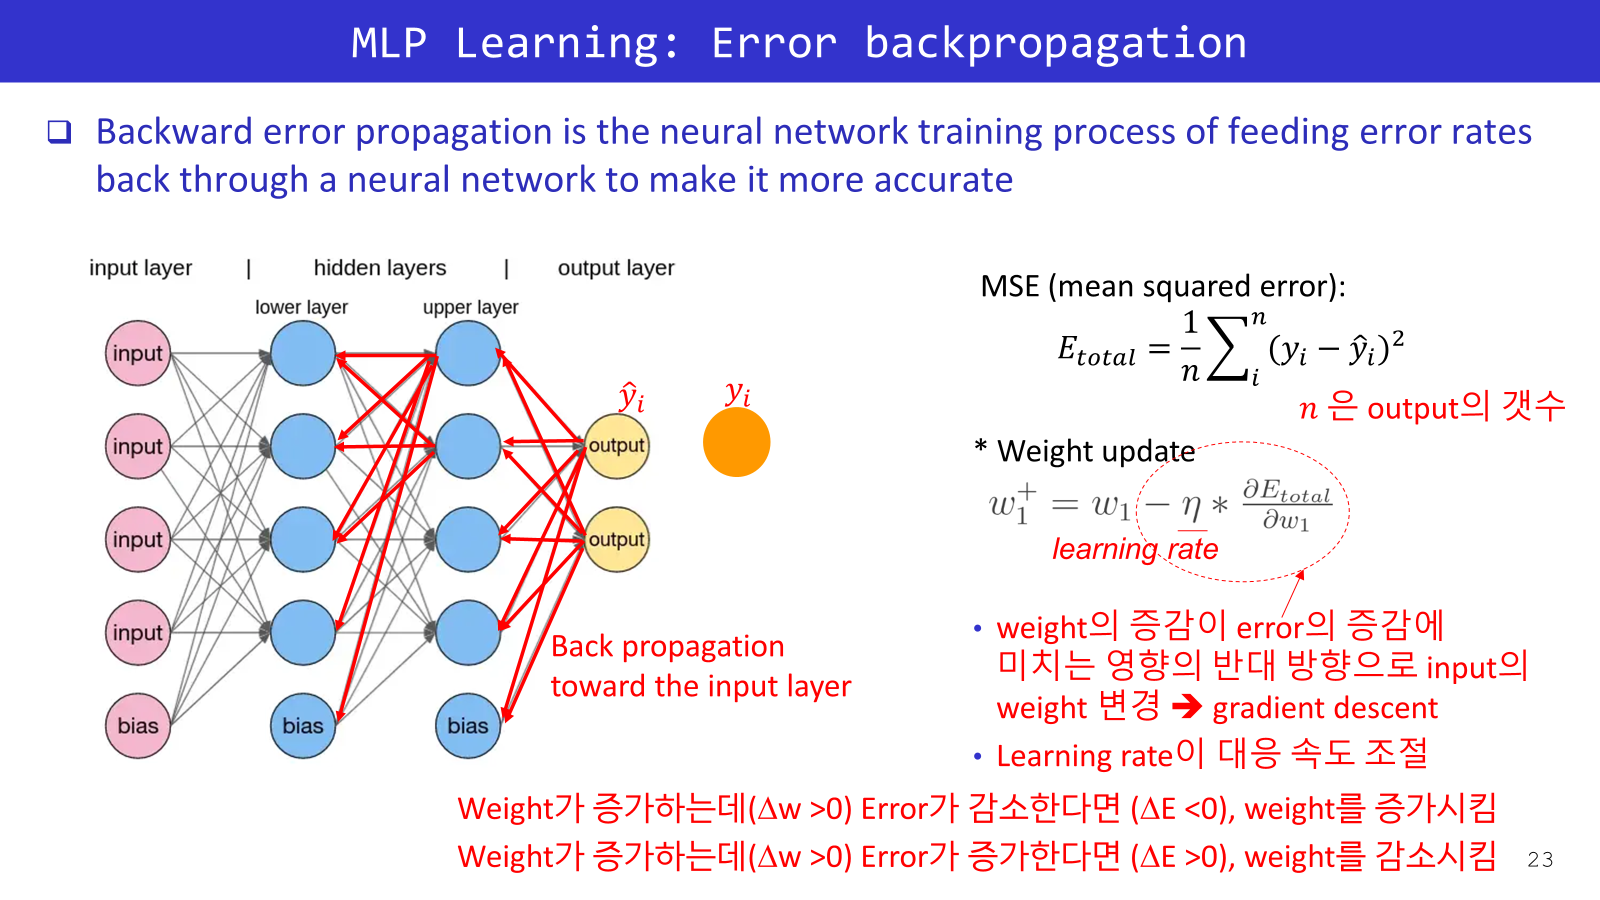

# Sin값 예측 모델 예시

In [ ]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 무작위로 입력과 출력 데이터를 생성합니다
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)

y = torch.sin(x)

# 무작위로 가중치를 초기화합니다
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

print(a, b, c, d)
learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 예측값 y를 계산합니다
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 손실(loss)을 계산하고 출력합니다
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # 손실에 따른 a, b, c, d의 변화도(gradient)를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # 가중치를 갱신합니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

tensor(-0.1068) tensor(-0.8413) tensor(0.7753) tensor(-0.5475)
99 1836.9556884765625
199 1219.273193359375
299 810.3638305664062
399 539.6412353515625
499 360.39166259765625
599 241.697265625
699 163.0932159423828
799 111.0330810546875
899 76.54959106445312
999 53.70585632324219
1099 38.57107925415039
1199 28.54229164123535
1299 21.896114349365234
1399 17.49083709716797
1499 14.570510864257812
1599 12.634214401245117
1699 11.35015869140625
1799 10.498445510864258
1899 9.93338394165039
1999 9.558433532714844
Result: y = -0.007357161026448011 + 0.8311516046524048 x + 0.0012692337622866035 x^2 + -0.08969053626060486 x^3


# backward()
- Backward 과정에서 필요한 Gradient를 자동 계산

In [ ]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # GPU에서 실행하려면 이 주석을 제거하세요

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
# requires_grad=False가 기본값으로 설정되어 역전파 단계 중에 이 텐서들에 대한 변화도를
# 계산할 필요가 없음을 나타냅니다.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 가중치를 갖는 임의의 텐서를 생성합니다. 3차 다항식이므로 4개의 가중치가 필요합니다:
# y = a + b x + c x^2 + d x^3
# requires_grad=True로 설정하여 역전파 단계 중에 이 텐서들에 대한 변화도를 계산할 필요가
# 있음을 나타냅니다.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 텐서들 간의 연산을 사용하여 예측값 y를 계산합니다.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 텐서들간의 연산을 사용하여 손실(loss)을 계산하고 출력합니다.
    # 이 때 손실은 (1,) shape을 갖는 텐서입니다.
    # loss.item() 으로 손실이 갖고 있는 스칼라 값을 가져올 수 있습니다.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # autograd 를 사용하여 역전파 단계를 계산합니다. 이는 requires_grad=True를 갖는
    # 모든 텐서들에 대한 손실의 변화도를 계산합니다.
    # 이후 a.grad와 b.grad, c.grad, d.grad는 각각 a, b, c, d에 대한 손실의 변화도를
    # 갖는 텐서가 됩니다.
    loss.backward()

    # 경사하강법(gradient descent)을 사용하여 가중치를 직접 갱신합니다.
    # torch.no_grad()로 감싸는 이유는, 가중치들이 requires_grad=True 지만
    # autograd에서는 이를 추적하지 않을 것이기 때문입니다.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # 가중치 갱신 후에는 변화도를 직접 0으로 만듭니다.
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1517.9656982421875
199 1026.9556884765625
299 696.372802734375
399 473.5910339355469
499 323.3156433105469
599 221.85081481933594
699 153.27468872070312
799 106.87940216064453
899 75.45803833007812
999 54.15531539916992
1099 39.69696807861328
1199 29.873355865478516
1299 23.191265106201172
1399 18.640972137451172
1499 15.538859367370605
1599 13.421601295471191
1699 11.974849700927734
1799 10.985175132751465
1899 10.307369232177734
1999 9.842606544494629
Result: y = 0.026159828528761864 + 0.8369464874267578 x + -0.00451300386339426 x^2 + -0.09051480889320374 x^3


In [ ]:
# -*- coding: utf-8 -*-
import torch
import math

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 이 예제에서, 출력 y는 (x, x^2, x^3)의 선형 함수이므로, 선형 계층 신경망으로 간주할 수 있습니다.
# (x, x^2, x^3)를 위한 텐서를 준비합니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# 위 코드에서, x.unsqueeze(-1)은 (2000, 1)의 shape을, p는 (3,)의 shape을 가지므로,
# 이 경우 브로드캐스트(broadcast)가 적용되어 (2000, 3)의 shape을 갖는 텐서를 얻습니다.

# nn 패키지를 사용하여 모델을 순차적 계층(sequence of layers)으로 정의합니다.
# nn.Sequential은 다른 Module을 포함하는 Module로, 포함되는 Module들을 순차적으로 적용하여
# 출력을 생성합니다. 각각의 Linear Module은 선형 함수(linear function)를 사용하여 입력으로부터
# 출력을 계산하고, 내부 Tensor에 가중치와 편향을 저장합니다.
# Flatten 계층은 선형 계층의 출력을 `y` 의 shape과 맞도록(match) 1D 텐서로 폅니다(flatten).
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# 또한 nn 패키지에는 주로 사용되는 손실 함수(loss function)들에 대한 정의도 포함되어 있습니다;
# 여기에서는 평균 제곱 오차(MSE; Mean Squared Error)를 손실 함수로 사용하겠습니다.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # 순전파 단계: x를 모델에 전달하여 예측값 y를 계산합니다. Module 객체는 __call__ 연산자를
    # 덮어써서(override) 함수처럼 호출할 수 있도록 합니다. 이렇게 함으로써 입력 데이터의 텐서를 Module에 전달하여
    # 출력 데이터의 텐서를 생성합니다.
    y_pred = model(xx)

    # 손실을 계산하고 출력합니다. 예측한 y와 정답인 y를 갖는 텐서들을 전달하고,
    # 손실 함수는 손실(loss)을 갖는 텐서를 반환합니다.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계를 실행하기 전에 변화도(gradient)를 0으로 만듭니다.
    model.zero_grad()

    # 역전파 단계: 모델의 학습 가능한 모든 매개변수에 대해 손실의 변화도를 계산합니다.
    # 내부적으로 각 Module의 매개변수는 requires_grad=True일 때 텐서에 저장되므로,
    # 아래 호출은 모델의 모든 학습 가능한 매개변수의 변화도를 계산하게 됩니다.
    loss.backward()

    # 경사하강법을 사용하여 가중치를 갱신합니다.
    # 각 매개변수는 텐서이므로, 이전에 했던 것처럼 변화도에 접근할 수 있습니다.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# list의 첫번째 항목에 접근하는 것처럼 `model` 의 첫번째 계층(layer)에 접근할 수 있습니다.
linear_layer = model[0]

# 선형 계층에서, 매개변수는 `weights` 와 `bias` 로 저장됩니다.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 530.8482055664062
199 357.0925598144531
299 241.2956085205078
399 164.0871124267578
499 112.5818862915039
599 78.20450592041016
699 55.246646881103516
799 39.90578079223633
899 29.648529052734375
999 22.785755157470703
1099 18.19106674194336
1199 15.112743377685547
1299 13.048830032348633
1399 11.663982391357422
1499 10.734039306640625
1599 10.109041213989258
1699 9.688647270202637
1799 9.40562629699707
1899 9.21491527557373
1999 9.086268424987793
Result: y = -0.010212821885943413 + 0.8438444137573242 x + 0.0017618812853470445 x^2 + -0.09149597585201263 x^3


# Optimizer 이용하기 (RMSprop)

- Optimzation 방법 및 학습할 파라미터, LR 미리 설정

In [ ]:
# -*- coding: utf-8 -*-
import torch
import math

# 입력값과 출력값을 갖는 텐서들을 생성합니다.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# 입력 텐서 (x, x^2, x^3)를 준비합니다.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# nn 패키지를 사용하여 모델과 손실 함수를 정의합니다.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# optim 패키지를 사용하여 모델의 가중치를 갱신할 optimizer를 정의합니다.
# 여기서는 RMSprop을 사용하겠습니다; optim 패키지는 다른 다양한 최적화 알고리즘을 포함하고 있습니다.
# RMSprop 생성자의 첫번째 인자는 어떤 텐서가 갱신되어야 하는지를 알려줍니다.

learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

for t in range(2000):
    # 순전파 단계: 모델에 x를 전달하여 예측값 y를 계산합니다.
    y_pred = model(xx)

    # 손실을 계산하고 출력합니다.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # 역전파 단계 전에, optimizer 객체를 사용하여 (모델의 학습 가능한 가중치인) 갱신할
    # 변수들에 대한 모든 변화도(gradient)를 0으로 만듭니다. 이렇게 하는 이유는 기본적으로
    # .backward()를 호출할 때마다 변화도가 버퍼(buffer)에 (덮어쓰지 않고) 누적되기
    # 때문입니다. 더 자세한 내용은 torch.autograd.backward에 대한 문서를 참조하세요.
    optimizer.zero_grad()

    # 역전파 단계: 모델의 매개변수들에 대한 손실의 변화도를 계산합니다.
    loss.backward()

    # optimizer의 step 함수를 호출하면 매개변수가 갱신됩니다.
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 30355.7421875
199 14468.91796875
299 6049.7158203125
399 1989.4317626953125
499 544.8284301757812
599 256.01885986328125
699 220.09368896484375
799 193.78826904296875
899 159.29803466796875
999 119.51261901855469
1099 80.6593017578125
1199 48.7923583984375
1299 26.94657325744629
1399 14.827969551086426
1499 10.014404296875
1599 8.935524940490723
1699 8.937658309936523
1799 8.840556144714355
1899 8.866608619689941
1999 8.965120315551758
Result: y = -0.0005265226936899126 + 0.8573459386825562 x + -0.0005265231593511999 x^2 + -0.09268617630004883 x^3


# 실제 데이터를 이용한 예시

## MNIST 데이터셋 (손글씨 분류 데이터셋)
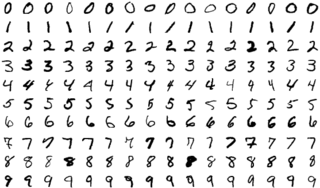

- 28x28 Pixel Image, Label (0~9)
- Input: 28x28 Pixel Image
- Output: Label Prediction

In [ ]:
!pip install matplotlib

import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
%matplotlib inline
# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 7.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 7.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 7.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 7.6 MB/s eta 0:00:00


In [ ]:
dataset = MNIST(root='data/',download =True,transform = ToTensor())
#Splitting dataset to train and validaion

val_size = 10000

train_size = len(dataset) - val_size

train_set,val_set = random_split(dataset,[train_size,val_size])

In [ ]:
batch_size = 128

train_loader = DataLoader(train_set,batch_size=batch_size,shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(val_set,batch_size=batch_size,shuffle=True,num_workers=2,pin_memory=True)

In [ ]:
test_image = train_set[0][0]
print(test_image.shape)
print(test_image)


torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000,

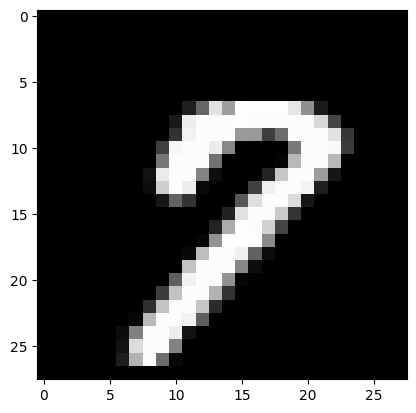

In [ ]:
# plot the sample
fig = plt.figure
plt.imshow(test_image[0], cmap='gray')
plt.show()

In [ ]:

class Net(nn.Module):
    #This defines the structure of the NN.

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) # x: [B,1,28,28] -->
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()  #Dropout
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        #Convolutional Layer/Pooling Layer/Activation
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        #Convolutional Layer/Dropout/Pooling Layer/Activation
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        #Fully Connected Layer/Activation
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        #Fully Connected Layer/Activation
        x = self.fc2(x)
        #Softmax gets probabilities.
        return F.log_softmax(x, dim=1)


In [ ]:

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        #Variables in Pytorch are differenciable.
        #This will zero out the gradients for this batch.
        optimizer.zero_grad()
        output = model(data)
        # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
        loss = F.nll_loss(output, target)
        #dloss/dx for every Variable
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()

        #Print out the loss periodically.
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            if args['cuda']:
                data, target = data.cuda(), target.cuda()
            data, target = data, target
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False) # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

        test_loss /= len(test_loader.dataset)

        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))




In [ ]:
args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=100
args['cuda']=False


In [ ]:
model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.314987
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.298603
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.248625
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.868742

Test set: Average loss: 0.9777, Accuracy: 8136/10000 (81%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.315228
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.166220
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.783170
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.826683

Test set: Average loss: 0.3635, Accuracy: 9036/10000 (90%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.767955
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.569864
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.444735
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.553750

Test set: Average loss: 0.2736, Accuracy: 9218/10000 (92%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.471005
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.607932
Train Epoch: 4 [25600/50000 (51%)]	Loss: 0.577236
Train Epoch: 4 [38400/50000 (77%)]	Loss: 0.523540

Test set: Average loss: 0.2283, Accu

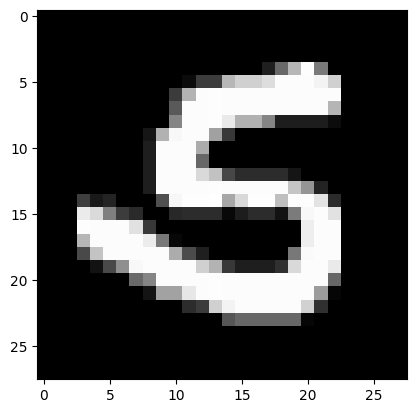

In [ ]:
# plot the sample
fig = plt.figure
plt.imshow(test_image[0], cmap='gray')
plt.show()

In [ ]:
with torch.no_grad():
    output = model(test_image.unsqueeze(1))

print(output)


tensor([[ -8.9584, -20.1652, -13.6127, -11.3325, -13.4826,  -0.0507,  -3.0181,
         -22.5720,  -7.7858, -13.8701]])


In [ ]:
predicted_label = torch.argmax(output, dim=-1)[0]

print(predicted_label.item())

5


# 실험1: 최적의 LR 찾기
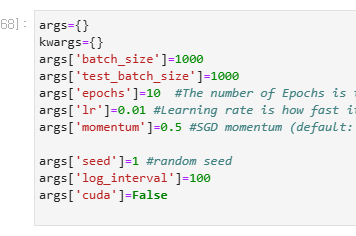

- 'lr' 변경

In [ ]:
args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=100
args['cuda']=False

model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.308912
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.173938
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.166712
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.807697

Test set: Average loss: 0.3898, Accuracy: 8827/10000 (88%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.569978
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.608433
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.391144
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.601860

Test set: Average loss: 0.2257, Accuracy: 9342/10000 (93%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.420159
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.483560
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.423497
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.382927

Test set: Average loss: 0.1781, Accuracy: 9473/10000 (95%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.491064
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.295080
Train Epoch: 4 [25600/50000 (51%)]	Loss: 0.345337
Train Epoch: 4 [38400/50000 (77%)]	Loss: 0.293412

Test set: Average loss: 0.1405, Accu

# 실험2: 네트워크 구조 변경

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=7,  stride=2, padding=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=7,  stride=2, padding=3)
        self.conv2_drop = nn.Dropout2d()  #Dropout
        self.fc1 = nn.Linear(980, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2_drop(self.conv2(x)))

        b,c,h,w = x.shape

        x = x.view(-1, c*h*w)

        #Fully Connected Layer/Activation

        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)

        #Fully Connected Layer/Activation
        x = self.fc2(x)
        #Softmax gets probabilities.
        return F.log_softmax(x, dim=1)

args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=100
args['cuda']=False

model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()



Train Epoch: 1 [0/50000 (0%)]	Loss: 2.315586
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.293483
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.258856
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.824423

Test set: Average loss: 0.7782, Accuracy: 7991/10000 (80%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.142757
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.885334
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.658385
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.512213

Test set: Average loss: 0.3485, Accuracy: 8986/10000 (90%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.524072
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.517056
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.548220
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.394672

Test set: Average loss: 0.2672, Accuracy: 9218/10000 (92%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.519614
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.362607
Train Epoch: 4 [25600/50000 (51%)]	Loss: 0.328237
Train Epoch: 4 [38400/50000 (77%)]	Loss: 0.477728

Test set: Average loss: 0.2231, Accu

# 네트워크 깊게 쌓아서 비교하기

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=7,  stride=2, padding=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=7,  stride=2, padding=3)
        self.conv3 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv4 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv5 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv6 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv7 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv8 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)

        self.fc1 = nn.Linear(980, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # [B,1,28,28]
        # [B,10, 28, 28] --> [B,10,14,14] --> [B,20,7,7] 7*7*20 = 980
        # [B,20, 28, 28]
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        x = F.relu(self.conv7(x))
        x = F.relu(self.conv8(x))

        b,c,h,w = x.shape

        x = x.view(-1, c*h*w)

        #Fully Connected Layer/Activation

        x = F.relu(self.fc1(x))
        #Fully Connected Layer/Activation
        x = self.fc2(x)
        #Softmax gets probabilities.
        return F.log_softmax(x, dim=1)


args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=100
args['cuda']=False

model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()



Train Epoch: 1 [0/50000 (0%)]	Loss: 2.303729
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.306154
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.304771
Train Epoch: 1 [38400/50000 (77%)]	Loss: 2.303761

Test set: Average loss: 2.3020, Accuracy: 1155/10000 (12%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 2.302050
Train Epoch: 2 [12800/50000 (26%)]	Loss: 2.301398
Train Epoch: 2 [25600/50000 (51%)]	Loss: 2.303798
Train Epoch: 2 [38400/50000 (77%)]	Loss: 2.301074

Test set: Average loss: 2.3017, Accuracy: 1155/10000 (12%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 2.298396
Train Epoch: 3 [12800/50000 (26%)]	Loss: 2.298895
Train Epoch: 3 [25600/50000 (51%)]	Loss: 2.303098
Train Epoch: 3 [38400/50000 (77%)]	Loss: 2.302888

Test set: Average loss: 2.3015, Accuracy: 1155/10000 (12%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 2.302060
Train Epoch: 4 [12800/50000 (26%)]	Loss: 2.302128
Train Epoch: 4 [25600/50000 (51%)]	Loss: 2.299620
Train Epoch: 4 [38400/50000 (77%)]	Loss: 2.302187

Test set: Average loss: 2.3015, Accu

In [ ]:
# 기울기 소실 문제 -> 네크워크를 깊게 만들면서도, 성능을 좋게 만들자

# ResNet
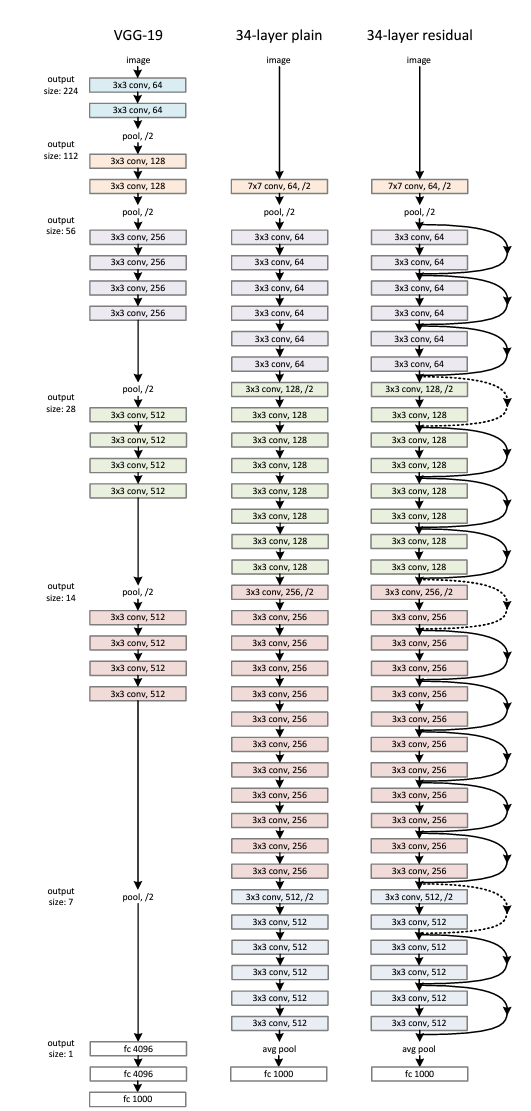
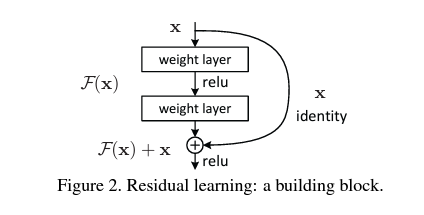

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=7,  stride=2, padding=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=7,  stride=2, padding=3)
        self.conv3 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv4 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv5 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv6 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv7 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv8 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.fc1 = nn.Linear(980, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        h = F.relu(self.conv3(x))
        x = F.relu(self.conv4(h)+x)

        h = F.relu(self.conv5(x))
        x = F.relu(self.conv6(h)+x)

        h = F.relu(self.conv7(x))
        x = F.relu(self.conv8(h)+x)

        b,c,h,w = x.shape

        x = x.view(-1, c*h*w)

        #Fully Connected Layer/Activation

        x = F.relu(self.fc1(x))
        #Fully Connected Layer/Activation
        x = self.fc2(x)
        #Softmax gets probabilities.
        return F.log_softmax(x, dim=1)


args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=100
args['cuda']=False

model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()



Train Epoch: 1 [0/50000 (0%)]	Loss: 2.307345
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.293761
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.250525
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.187819

Test set: Average loss: 0.5898, Accuracy: 8162/10000 (82%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.602378
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.448242
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.384663
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.370079

Test set: Average loss: 0.2625, Accuracy: 9208/10000 (92%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.281998
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.386929
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.164982
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.218436

Test set: Average loss: 0.1991, Accuracy: 9382/10000 (94%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.112631
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.100099
Train Epoch: 4 [25600/50000 (51%)]	Loss: 0.120977
Train Epoch: 4 [38400/50000 (77%)]	Loss: 0.160291

Test set: Average loss: 0.1625, Accu

In [ ]:
class ResNet(nn.Module):
    def _init_(self):
        super(ResNet, self)._init_()

    def forward(self, x):

        return x

# Deep Neural Network에서 Drop-out 효과 확인해보기

- Dropout 성능 비교

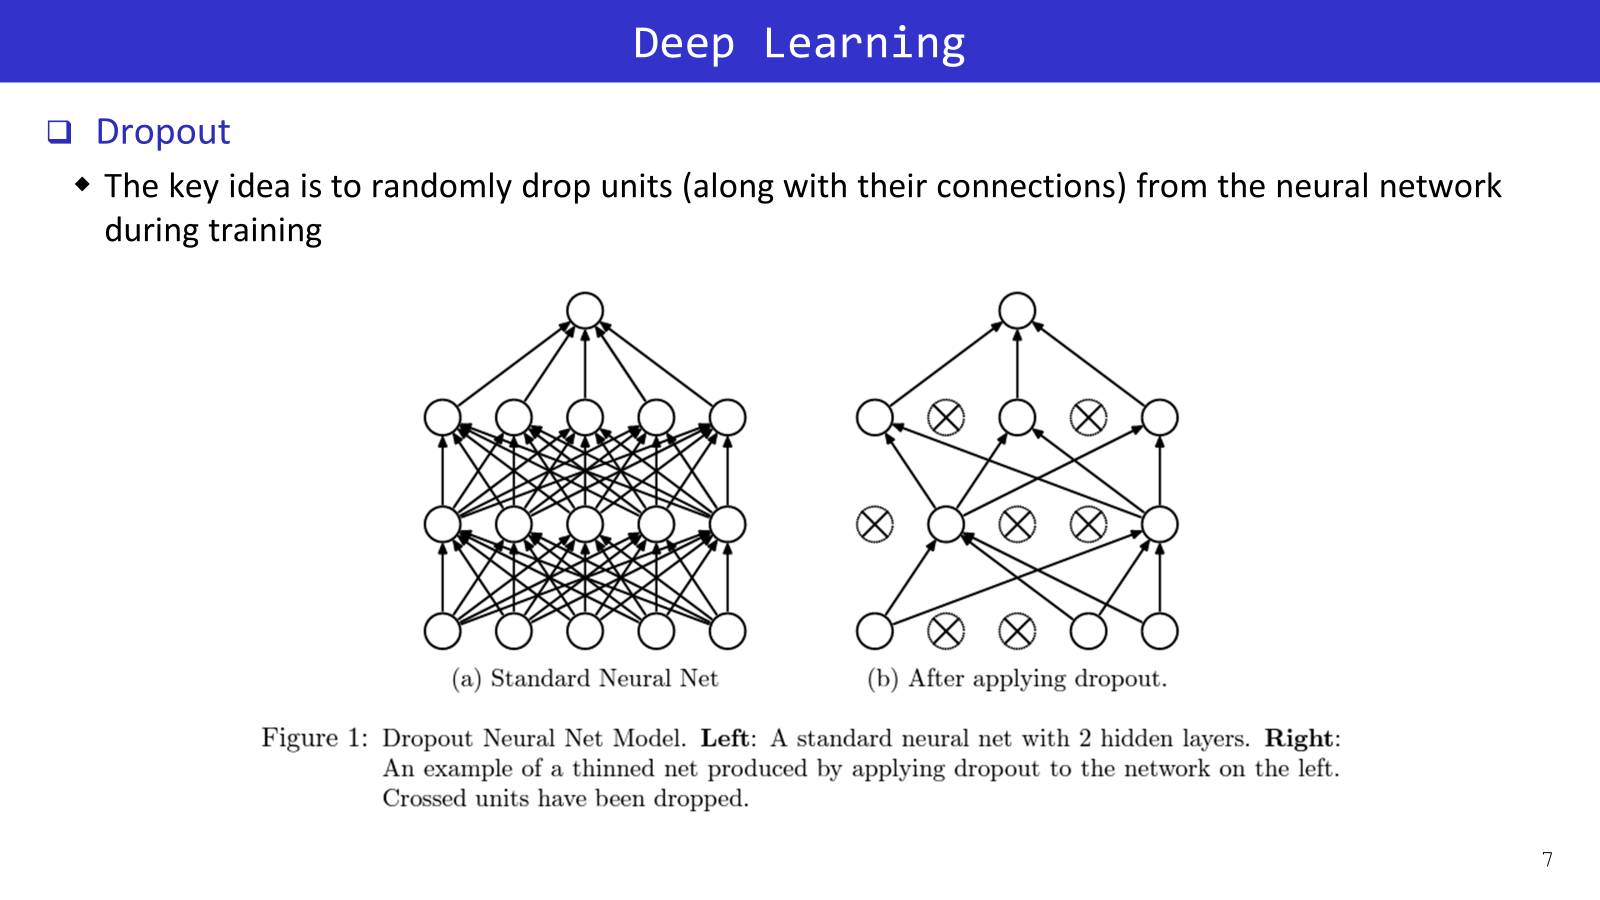

In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=7,  stride=2, padding=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=7,  stride=2, padding=3)
        self.conv3 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)

        self.conv4 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv4_drop = nn.Dropout2d()  #Dropout
        self.conv5 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)

        self.conv6 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv6_drop = nn.Dropout2d()  #Dropout

        self.conv7 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)

        self.conv8 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv8_drop = nn.Dropout2d()  #Dropout

        self.fc1 = nn.Linear(980, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        h = F.relu(self.conv3(x))
        x = F.relu(self.conv4_drop(self.conv4(h))+x)

        h = F.relu(self.conv5(x))
        x = F.relu(self.conv6_drop(self.conv6(h))+x)

        h = F.relu(self.conv7(x))
        x = F.relu(self.conv8_drop(self.conv8(h))+x)

        b,c,h,w = x.shape

        x = x.view(-1, c*h*w)

        #Fully Connected Layer/Activation

        x = F.relu(self.fc1(x))
        #Fully Connected Layer/Activation
        x = self.fc2(x)
        #Softmax gets probabilities.
        return F.log_softmax(x, dim=1)


args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=100
args['cuda']=False

model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()



Train Epoch: 1 [0/50000 (0%)]	Loss: 2.301315
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.285662
Train Epoch: 1 [25600/50000 (51%)]	Loss: 2.095968
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.592831

Test set: Average loss: 0.4121, Accuracy: 8809/10000 (88%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.435225
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.330305
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.468923
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.520565

Test set: Average loss: 0.2477, Accuracy: 9249/10000 (92%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.363391
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.236918
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.075485
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.257970

Test set: Average loss: 0.1808, Accuracy: 9431/10000 (94%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.241246
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.248582
Train Epoch: 4 [25600/50000 (51%)]	Loss: 0.224413
Train Epoch: 4 [38400/50000 (77%)]	Loss: 0.129624

Test set: Average loss: 0.1552, Accu

In [ ]:
해봐야하는 고민, 드롭아웃을 하면 무조건 성능이 좋아질까 (학습을 오래하면, 일반적으로 성능 높)
오버피팅이 언제일어날까> (트레이닝 로스는 떨어지는데, 벨리데이션 로스는 오름 / 정확도가 안좋아짐)

# Practice

네트워크 및 학습 Hyper-parameter를 수정하고 Test Set Accuracy를 높혀보기

1. Activation (https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
- nn.ReLu
- nn.LeakyReLU
- nn.GELU
- nn.Mish
- nn.SiLU
2. Conv2D Parameter 변경해보기 (Padding --> (Kernel-1)//2)

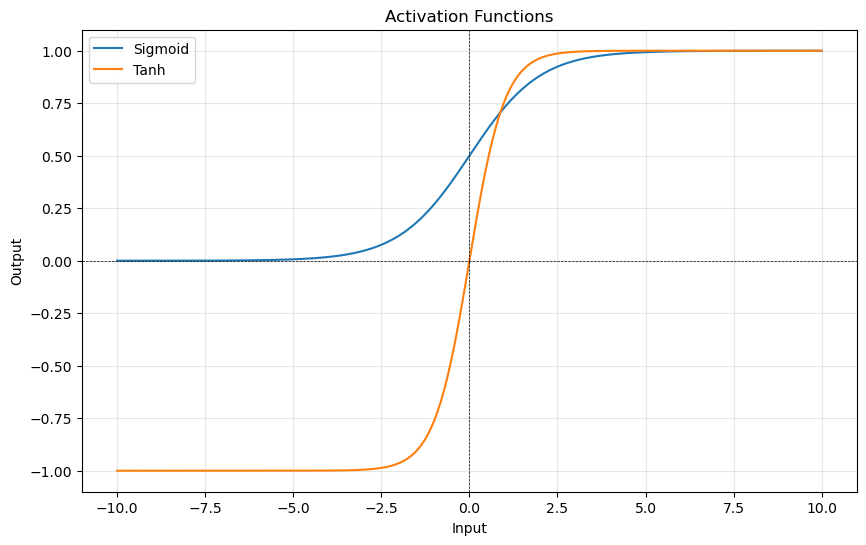

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

activation_functions = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh()
}

x = torch.linspace(-10, 10, 1000)

plt.figure(figsize=(10, 6))
for name, func in activation_functions.items():
    y = func(x)
    plt.plot(x.numpy(), y.detach().numpy(), label=name)

plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


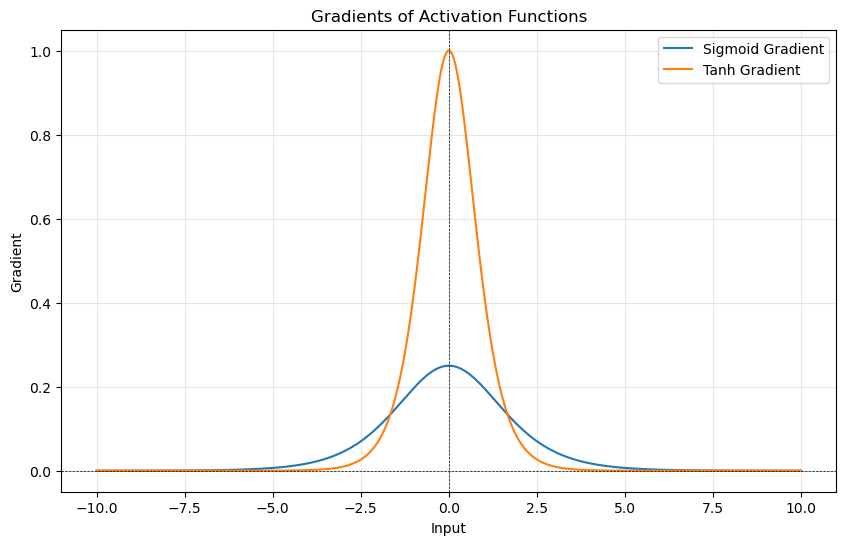

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

activation_functions = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh()
}

x = torch.linspace(-10, 10, 1000, requires_grad=True)

plt.figure(figsize=(10, 6))
for name, func in activation_functions.items():
    y = func(x)
    y.backward(torch.ones_like(x), retain_graph=True)
    gradients = x.grad.detach().clone()
    plt.plot(x.detach().numpy(), gradients.numpy(), label=f"{name} Gradient")
    x.grad.zero_()

plt.title("Gradients of Activation Functions")
plt.xlabel("Input")
plt.ylabel("Gradient")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


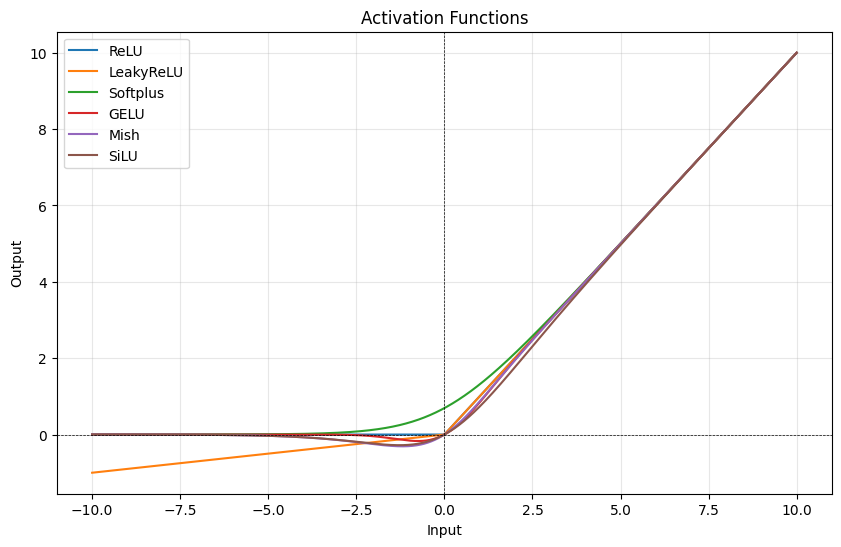

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

activation_functions = {
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(0.1),
    "Softplus": nn.Softplus(),
    "GELU": nn.GELU(),
    "Mish": nn.Mish(),
    "SiLU": nn.SiLU()
}

x = torch.linspace(-10, 10, 1000)

plt.figure(figsize=(10, 6))
for name, func in activation_functions.items():
    y = func(x)
    plt.plot(x.numpy(), y.detach().numpy(), label=name)

plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


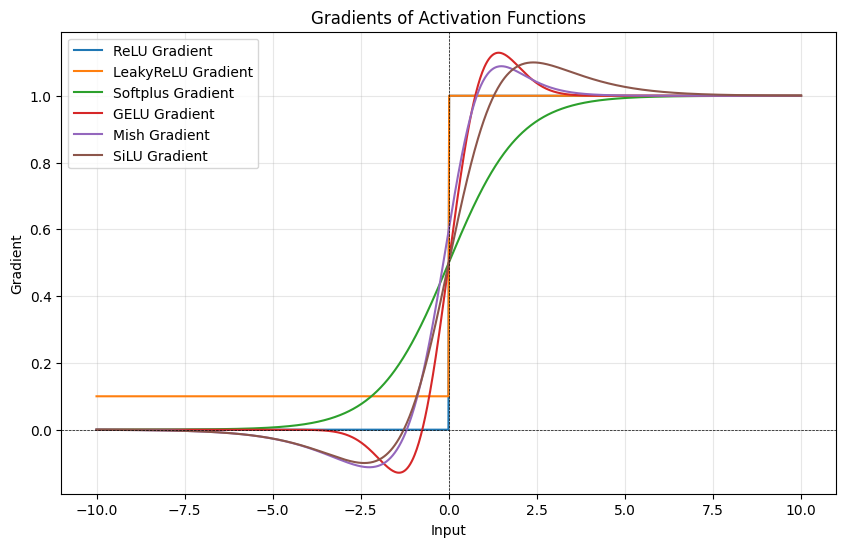

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

activation_functions = {
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU(0.1),
    "Softplus": nn.Softplus(),
    "GELU": nn.GELU(),
    "Mish": nn.Mish(),
    "SiLU": nn.SiLU()
}

x = torch.linspace(-10, 10, 1000, requires_grad=True)

plt.figure(figsize=(10, 6))
for name, func in activation_functions.items():
    y = func(x)
    y.backward(torch.ones_like(x), retain_graph=True)
    gradients = x.grad.detach().clone()
    plt.plot(x.detach().numpy(), gradients.numpy(), label=f"{name} Gradient")
    x.grad.zero_()

plt.title("Gradients of Activation Functions")
plt.xlabel("Input")
plt.ylabel("Gradient")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=7,  stride=2, padding=3)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=7,  stride=2, padding=3)

        self.conv3 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)

        self.conv4 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv4_drop = nn.Dropout2d()  #Dropout
        self.conv5 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)

        self.conv6 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv6_drop = nn.Dropout2d()  #Dropout

        self.conv7 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)

        self.conv8 = nn.Conv2d(20, 20, kernel_size=7,  stride=1, padding=3)
        self.conv8_drop = nn.Dropout2d()  #Dropout

        self.fc1 = nn.Linear(980, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):

        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))

        h = F.relu(self.conv3(x))
        x = F.relu(self.conv4_drop(self.conv4(h))+x)
        h = F.relu(self.conv5(x))
        x = F.relu(self.conv6_drop(self.conv6(h))+x)
        h = F.relu(self.conv7(x))
        x = F.relu(self.conv8_drop(self.conv8(h))+x)
        b,c,h,w = x.shape

        x = x.view(-1, c*h*w)

        #Fully Connected Layer/Activation

        x = F.relu(self.fc1(x))
        #Fully Connected Layer/Activation
        x = self.fc2(x)
        #Softmax gets probabilities.
        return F.log_softmax(x, dim=1)


args={}
kwargs={}
args['batch_size']=1000
args['test_batch_size']=1000
args['epochs']=10  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.02 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=100
args['cuda']=False

model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()



Train Epoch: 1 [0/50000 (0%)]	Loss: 2.310281
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.056065
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.527471
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.395670

Test set: Average loss: 0.2846, Accuracy: 9144/10000 (91%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 0.233652
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.231898
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.230017
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.142592

Test set: Average loss: 0.1742, Accuracy: 9439/10000 (94%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 0.215328
Train Epoch: 3 [12800/50000 (26%)]	Loss: 0.215778
Train Epoch: 3 [25600/50000 (51%)]	Loss: 0.160031
Train Epoch: 3 [38400/50000 (77%)]	Loss: 0.121737

Test set: Average loss: 0.1241, Accuracy: 9600/10000 (96%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 0.148414
Train Epoch: 4 [12800/50000 (26%)]	Loss: 0.230176
Train Epoch: 4 [25600/50000 (51%)]	Loss: 0.177717
Train Epoch: 4 [38400/50000 (77%)]	Loss: 0.157986

Test set: Average loss: 0.0986, Accu